# PROYECTO1-ETAPA1

**INTEGRANTES**
- Juan Sebastian Sanchez Delgado - 202013577
- Miguel Angel Cardenas - 202010998
- Santiago Paeres Gonzalez - 201425176

## 1. Entendimiento y preparacion de los datos


In [1]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Descargando stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df_ods = pd.read_csv("./cat_345.csv", sep=';', encoding = 'utf8')

In [5]:
df_ods.shape

(3000, 2)

In [46]:
df_ods.dtypes

Textos_espanol    object
sdg                int64
dtype: object

In [47]:
df_ods.sample(5)

,Textos_espanol,sdg
406,"Una vez más, los programas que enfatizan la ed...",3
2910,Estos resultados tienen algunas implicaciones ...,5
1258,"Tras las prácticas, los estudiantes informan a...",4
2670,Implica que ella da una compensación a su espo...,5
914,"Ambos se enfrentan a retos complejos, en los q...",3


### 1.1 Completitud

In [7]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_ods.isnull().sum() / df_ods.shape[0]

Textos_espanol    0.0
sdg               0.0
dtype: float64

In [8]:
# Cálculo de porcentaje de valores nulos por columna
((df_ods.isnull().sum()/df_ods.shape[0])).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

### 1.2 Unicidad

In [9]:
# Se revisa el numero de filas duplicadas
df_ods.duplicated(keep = False).sum()

0

### 1.3 Consistencia

In [11]:
df_ods["Textos_espanol"] = df_ods["Textos_espanol"].astype(str)

### 1.4 Validez

In [12]:
df_ods['sdg'].value_counts()

3    1000
4    1000
5    1000
Name: sdg, dtype: int64

In [13]:
df_ods['Textos_espanol'].value_counts()

Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.                                                        

In [14]:
df_ods.sample(20)

,Textos_espanol,sdg
2666,Esto requiere crear espacios seguros y confian...,5
383,Desarrollar un rol de enfermera de atención pr...,3
2487,El Comité de Derechos Humanos se ha unido a ot...,5
2418,Las catástrofes suelen magnificar los patrones...,5
2004,Otra razón por la que hay menos mujeres que ho...,5
1798,Un estudio encuentra que las tasas de desemple...,4
2915,"Además, debido a la segregación ocupacional ge...",5
891,Este método no solo es más costoso para el púb...,3
394,La ley anterior tenía una serie de deficiencia...,3
1213,"En particular, pidió medidas de innovación en ...",4


In [15]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
10,Dos encuestados seÃ±alaron que no existe un or...,3
26,"También promueve mejoras en la prevención, el ...",3
30,La falta de programas completos de acreditació...,3
46,Dado el aumento de enfermedades crónicas como ...,3
...,...,...
2984,Las actividades empresariales siguen viéndose ...,5
2990,La Agenda Nacional de Jordania 2006-15 estable...,5
2991,"En la mayoría de los países de la CAO, los fun...",5
2996,"Por el contrario, el porcentaje de hogares en ...",5


In [16]:
# Remplaza lo caracteres erroneos con su equivalencia pero en UTF-8
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã¡', 'á')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã©', 'é')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã³', 'ó')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ãº', 'ú')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã±', 'ñ')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã', 'í')

In [17]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg


In [18]:
df_ods.sample(10)

,Textos_espanol,sdg
474,Las entrevistas se realizan anualmente a todos...,3
2088,La mayor participación de las mujeres en el me...,5
1252,Algunos de estos adultos tienen como máximo un...,4
2978,La desigualdad salarial de género también pued...,5
643,La vinculación de los requisitos de EMC y DPC ...,3
2432,Reducir tales disparidades y permitir que las ...,5
2189,Al aprender sobre sus derechos y su ciudadanía...,5
1642,Un análisis de estudios de cohortes británicos...,4
2570,El sistema de justicia penal debe buscar resta...,5
2900,"A continuación, discutimos brevemente algunas ...",5


### 1.5 Transformacion

In [19]:
# Se dividen los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_ods["Textos_espanol"], df_ods["sdg"], test_size=0.3, stratify=df_ods["sdg"], random_state=1)

In [20]:
X_train.shape, X_test.shape

((2100,), (900,))

In [21]:
pd.Series(y_train).value_counts(normalize=True)

4    0.333333
3    0.333333
5    0.333333
Name: sdg, dtype: float64

In [22]:
pd.Series(y_test).value_counts(normalize=True)

3    0.333333
4    0.333333
5    0.333333
Name: sdg, dtype: float64

In [23]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [27]:
X_bow = bow.fit_transform(X_train)

In [28]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15134


In [29]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [30]:
X_tfidf = tfidf.fit_transform(X_train)

In [31]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15134


## 2. Modelado y evaluacion

### 2.1 Entrenando Modelo con BoW y Random Forest classifier (Juan Sebastian Sanchez Delgado)

In [32]:
bow_model = RandomForestClassifier(random_state=2)

In [33]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

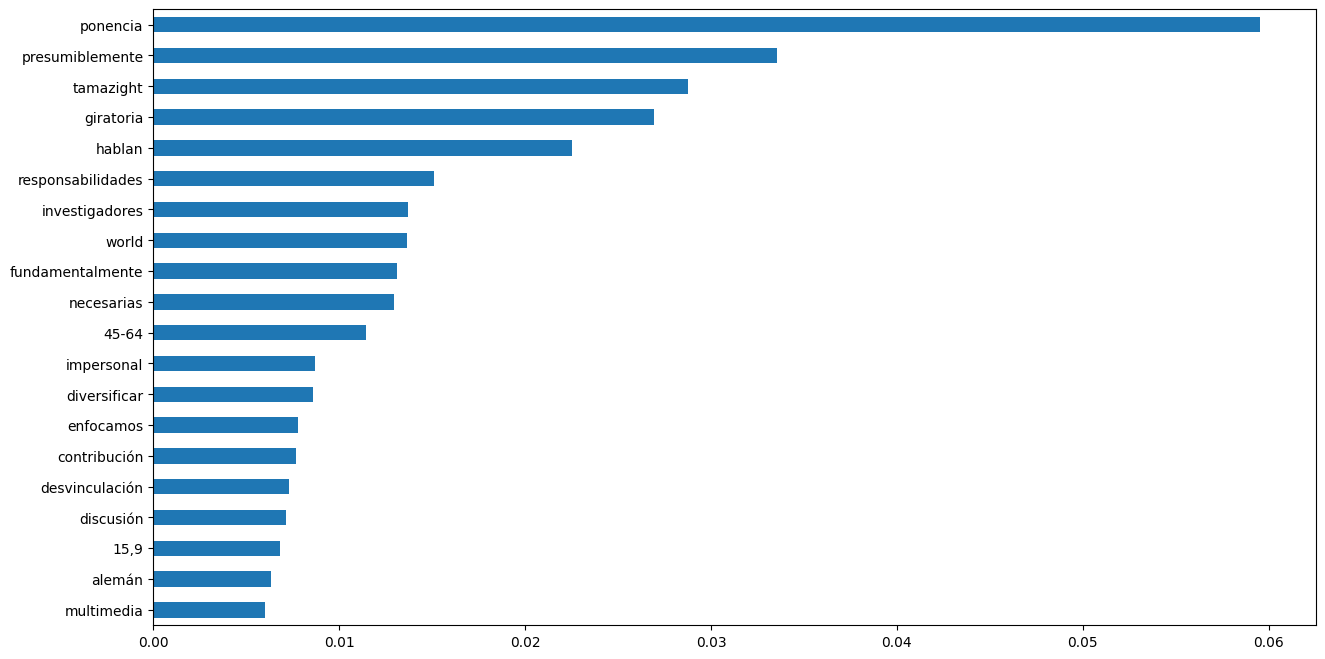

In [48]:
# Se muestra la importancia de algunas palabras para determinar que tan relevante es para tomar una decision para el modelo
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [37]:
bow_estimators = bow_model.estimators_
print("Numero de arboles de decision:", len(bow_estimators))
print("Profundidad de los arboles (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 97.14


In [38]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

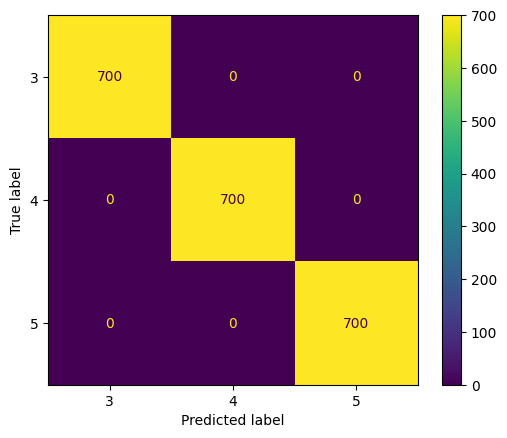

In [39]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

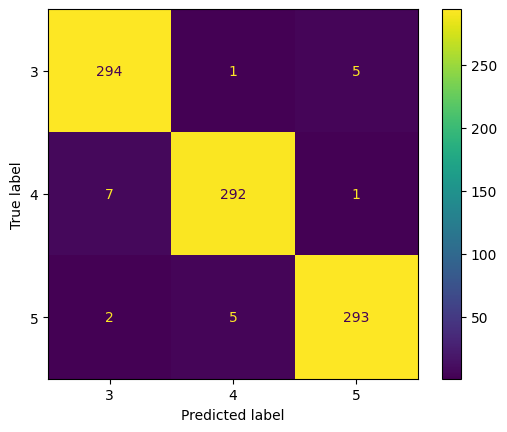

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [44]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [45]:
print("Precision:", precision_score(y_test, y_test_bow_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_bow_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_bow_predict, average='micro'))

Precision: 0.9766666666666667
Recall: 0.9766666666666667
F1: 0.9766666666666667


### 2.2 Entrenando modelo con TF-IDF

### 2.3 Algoritmo 3

## 3. Resultados